In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

stroop = pd.read_csv('stroopdata.csv')
stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


### 1 What is our independent variable? What is our dependent variable?

#### Independent variable: Weather the word is the same as the color of the word (Congruent or Incongruent)
#### Dependent variable: time takes to recognize color of words

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [32]:
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [36]:
print (np.std(stroop['Congruent']))
print (np.std(stroop['Incongruent']))

3.4844157127666326
4.696055134513317


We can see that the mean of Congruent test and Incongruent test are 14 and 22 respectively.  The standard deviation of Congruent section and Incongruent section are 3.48 and 4.69 respectively.

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.



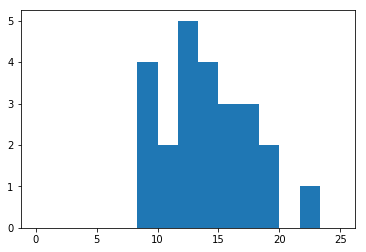

In [53]:
plt.hist(stroop['Congruent'], 15, range=(0,25))
plt.show()

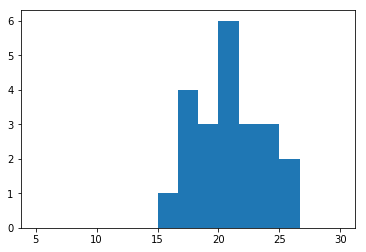

In [51]:
plt.hist(stroop['Incongruent'], 15, range=(5, 30))
plt.show()

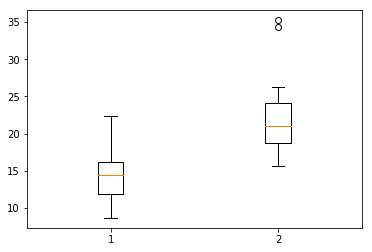

In [54]:
data = [stroop['Congruent'], stroop['Incongruent']]
plt.figure()
plt.boxplot(data)
plt.show()

From histogram of Congruent time and Incongruent time we can see that the data is approximately normally distributed, from box plot we can see that most time in Incongruent group is greater than time in Congruent group.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

* $\mu_1$ represents the population average time people spent in Congruent group.
* $\mu_2$ represents the population average time people spent in Incongruent group.

* $H_0$: $\mu_1$ >= $\mu_2$. My null hypothesis is that the average population time people spent in Congruent group is larger than the average population time people spent in Incongruent group.
* $H_1$: $\mu_1$ < $\mu_2$. My alternative hypothesis is that the average population time people spent in Congruent group is smaller than the average population time people spent in Incongruent group.

From the last part we know that both of Congruent group and Incongruent group are normally distributed. So we have t-test and z-test available. However, consider the sample size in both group is 24 which is a relative small size, and we don’t know the population standard error. Therefore, I would like to use t-test. Our data includes two tests, one for congruent condition, another for incongruent condition, so I would use paired sample test. Since I suppose that the time spent to recognize color in Incongruent group is greater than that in Congruent group, I would use one-tailed test. In summary I would use one-tailed paired sample(dependent) t-test for this dataset.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?



In [91]:
diff = (stroop['Incongruent'] - stroop['Congruent'])
diff_mean = np.mean(diff)
print (diff_mean)

7.964791666666667


In [100]:
n = 24
s = math.sqrt(np.sum((diff - diff_mean) ** 2) / (n-1))

print (s)
standard_error = s / math.sqrt(n)
print (standard_error)


4.864826910359056
0.9930286347783406


In [102]:
t_stat = diff_mean / standard_error
print (t_stat)

8.020706944109957


T critical value for α=0.01 is 2.5, which is smaller than the absolute value of our t statistic value 8.02, so we reject the null hypothesis. Thus we accept the alternative hypothesis, that is “Average of time population in Incongruent group is greater than average of time population in Congruent group”. This means that words do help people to recognize color in Congruent group or words do interfere people to recognize color in Incongruent group. The t-test is a two independent group t-test. 



In [103]:
lower_confidence_interval = diff_mean - 2.5 * standard_error / math.sqrt(24)
upper_confidence_interval = diff_mean + 2.5 * standard_error / math.sqrt(24)
print (lower_confidence_interval, upper_confidence_interval)

7.458038863504265 8.471544469829068


### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The inconsistent between color and word caused the gap of time peopele spent in two groups, since it takes time of our brain to regocnize the difference and control our natural impulse. The above is just my educated guess. A similar task with a similar effect I would like to propose is to a group of numbers with their correspondent English word as a congruent group, while a group of numbers with unmatched English word as an incongruent group.